<a href="https://colab.research.google.com/github/CIS-519/coding-hw-dev/blob/master/hw0/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SSU CSE 2150508501 2025-1 - Homework 1**

### **NOTE**: "manually graded" should be submitted along with the written homework solutions

## **Intro to Python Libraries**
In this assignment, we will get acquainted with several important data libraries for machine learning.  The assumption here is that you have already, if necessary, done a thorough review of the basics of python, as in [this series](https://realpython.com/courses/python-turtle-beginners/).


## Imports
Let's import 2 data-related packages we will use throughout this course: numpy, and pandas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

from pandas.io.pytables import dropna_doc

NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
NOTEBOOK

## Numpy

`numpy` is the typical library used to work with arrays.  You can either convert python lists into arrays, or use one of the many libraries which works with arrays, such as `sklearn`

**Question 1a (5 points):** In the following assignment, you will create a function which returns a numpy array using the method np.array(xs), where xs is a list.  The function should take a positive integer n, and return $[e^0 = 1, e^1 = e,..., e^n]$.

In [ ]:
def exps_up_to_n(n : int) -> np.array:
    '''
    inputs: a number n.
    outputs: a numpy array X with shape (n + 1), such that for all i between 0 and n (inclusive), X[i] = e^i.
    Useful functions are math.exp and range'''
    # STUDENT TODO START:
    return np.array([math.exp(i) for i in range(0, n + 1)])
    # STUDENT TODO END

In [ ]:
exps_up_to_n(10)

Included in every question is one or more test cases that can be used to check if your implementation is likely to satisfy the grader.

In [ ]:
# local test case
def test_eval_exps():
    """We will have hidden values for n in the real gradescope"""
    n = 5
    val = map(int, exps_up_to_n(n))
    assert(list(val) == [1,2,7,20,54,148])

# run local test case only in the notebook
if NOTEBOOK:
  test_eval_exps()

**Question 1b (10 points):** You will find the mean and standard deviation of a numpy array.  Note that this can be done without numpy library functions, although it is much easier with such functions - either version will receive full points if correct.  Partial credit will be awarded if either the mean or standard deviation is computed correctly, but the other is not.

In [ ]:
def mean_standard_dev_tuple_from_xs(xs : np.array):
    '''
    inputs: a numpy array xs
    outputs: a tuple (mu, sigma), where mu is the mean of xs, and sigma is the standard deviation of xs.
    '''
    # STUDENT TODO START:
    mean: float = np.mean(xs) # 평균
    standard_deviation: float = np.std(xs) # 표준 편차
    return mean, standard_deviation
    # STUDENT TODO END

In [ ]:
def test_mean_standard_dev_tuple_from_xs_1():
        """We will have hidden values for xs in the real gradescope"""
        xs = [math.exp(i*2.1)/3 for i in range(10)]
        assert(int(mean_standard_dev_tuple_from_xs(xs)[0]) == 6134451)

def test_mean_standard_dev_tuple_from_xs_2():
        """We will have hidden values for xs in the real gradescope"""
        xs = [math.exp(i*2.1)/3 for i in range(10)]
        assert(int(mean_standard_dev_tuple_from_xs(xs)[1]) == 16017926)

# run test cases
if NOTEBOOK:
  test_mean_standard_dev_tuple_from_xs_1()
  test_mean_standard_dev_tuple_from_xs_2()

## Pandas
Another common way of organizing code is with the Pandas library.  Pandas represents data as DataFrames and Series, where Series are vectors of dara and DataFrames represent labeled sets of Series.  We'll use a dataframe provided by a data collection in a library called seaborn.

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')

iris

This dataset is one of the most commonly used introductions to data science.  It involves 4 features, which are all real numbers between 0 and some maximum size.  Later, we'll learn how to use those features to predict a label associated with each data point (what type of flower it represents).  For now, we'll learn how to find the subset of the data with a given label.

In [ ]:
iris.iloc[np.where(iris["species"] == "setosa")[0]]

**Question 2 (10 points)**: Your assignment is to write a function which takes a flower class, one of either "setosa", "versicolor," or "virginica," and a number $n$, and return the mean sepal length of the top n flowers of that class, sorted by sepal width (so the mean sepal length of the n flowers with the highest sepal width out of all flowers in the class.)

In [ ]:
def get_mean_sepal_length_from_class_top_n_width(iris, flower_class:str, n:int) -> float:
    '''
    inputs: the iris dataset, a flower_class string and a positive integer
    output: a floating point number
    using the iris dataset provided above as a pandas DataFrame,
    a) obtain only those datapoints which correspond to the given class
    b) find the top n of that subset according to sepal width
    c) return the mean sepal length of that smaller subset
    '''
    # STUDENT TODO START:
    filtered: np.array = iris.iloc[np.where(iris["species"] == flower_class)[0]] # "species"열에서 flower_class에 해당하는 값만 필터링
    sorted_by_sepal_width_top_n: np.array = filtered.sort_values(by=["sepal_width"], ascending=False)[:n] # np.sort_values를 통해 "sepal_width"열을 기준으로 내림차순 정렬 후, list slicing을 통해 상위 n개만 추출
    return np.mean(sorted_by_sepal_width_top_n["sepal_length"]) # 평균 계산해서 반환
    # STUDENT TODO END

In [ ]:
def test_get_mean():
    """We will have hidden values for species and n in the real gradescope"""
    n = 5
    species = "setosa"
    species_top_n = [5.7, 5.5, 5.2, 5.8, 5.4]
    species_mean = round(get_mean_sepal_length_from_class_top_n_width(iris, species, n), 2)
    assert (species_mean == 5.52)

# run test case
if NOTEBOOK:
  test_get_mean()

**Question 3 (10 points):** Your next task is to take a subset of the iris dataset, which will only have the first n examples of each species; then return a copy of the modified subset that has an integer-valued instead of a string-valued "species" column. 0 corresponds to "setosa", 1 corresponds to "versicolor", and 2 corresponds to "virginica".  As we will learn, using "integer-based categorical representations" is quite useful in many classification tasks and other types of tasks involving variables associated with different categories.

In [ ]:
def string_to_categorical_int(iris, n : int) -> pd.DataFrame:
    '''
    input: the iris dataset, a positive integer n
    output: a new dataframe df2 which contains the same data as df except
    a) only the first n examples of each species are retained
    b) the species labels are converted from strings to integers between 0 and 2 according to the above scheme
    '''
    # STUDENT TODO START:
    classified_setosa: np.array = iris.iloc[np.where(iris["species"] == "setosa")[0]][:n]
    classified_versicolor: np.array = iris.iloc[np.where(iris["species"] == "versicolor")[0]][:n]
    classified_virginica: np.array = iris.iloc[np.where(iris["species"] == "virginica")[0]][:n]

    df2 = pd.concat([classified_setosa, classified_versicolor, classified_virginica]) # pd.concat을 통해 np.array 합칠 수 있음
    df2["species"] = df2["species"].map({"setosa": 0, "versicolor": 1, "virginica": 2}) # pd.concat을 통해 특정 열에에 대해 특정 값을 mapping할 수 있음
    return df2
    # STUDENT TODO END

In [ ]:
def test_string_to_cat1():
        """We will have hidden values for species, n and column in the real gradescope"""
        n = 5
        df2 = string_to_categorical_int(iris, n)
        species = "setosa"
        species_cat = {"setosa":0, "versicolor":1, "virginica":2}[species]
        column = "species"
        assert (df2[column].tolist() == [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

def test_string_to_cat2():
        n = 5
        """We will have hidden values for species, n and column in the real gradescope"""
        df2 = string_to_categorical_int(iris, n)
        species = "setosa"
        species_cat = {"setosa":0, "versicolor":1, "virginica":2}[species]
        column = "sepal_length"
        column_vals_df2 = [5.1, 4.9, 4.7, 4.6, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5, 6.3, 5.8, 7.1, 6.3, 6.5]
        assert (df2[column].tolist() == column_vals_df2)

def test_string_to_cat3():
        """We will have hidden values for n in the real gradescope"""
        n = 5
        df2 = string_to_categorical_int(iris, n)
        assert (np.all(df2.columns == iris.columns))

# run test cases
if NOTEBOOK:
  test_string_to_cat1()
  test_string_to_cat2()
  test_string_to_cat3()

## **Datasets**
Next, we will download all datasets from Google Drive to your local runtime. After successful download, you may verify that all datasets are present in your colab instance or your run directory.

HW1 Datasets:
- [CSE-SSU_hw1_diabetes_train.csv](https://drive.google.com/file/d/1w9_4pyJuG9KC3cg00ILhZRdkjqhEuNtD/view?usp=sharing)
- [CSE-SSU_hw1_diabetes_test.csv](https://drive.google.com/file/d/1W0kVVfR1DIGxgmH_oY1MBpPMcPslR8T8/view?usp=sharing)

In [ ]:
train_df = pd.read_csv("CSE-SSU_hw1_diabetes_train.csv")
train_df

# **4. Logistic Regression**

## **4.1. Logistic Regression Implementation [18 pts]**

Implement logistic regression with both L1 and L2 regularization by completing the LogisticRegression class.  

Your class must implement the following API:

* `__init__(alpha, tol, max_iter, theta_init, penalty, lambd)`
* `sigmoid(x)`
* `compute_cost(theta, X, y)`
* `compute_gradient(theta, X, y)`
* `has_converged(theta_old, theta_new)`
* `fit(X, y)`
* `predict_proba(X)`
* `predict(X)`

Note that these methods have already been defined correctly for you in the LogisticRegression class. **DO NOT** change the API.

---

### **4.1.1. Sigmoid Function [1 pt]**

You should begin by implementing the `sigmoid` function.  As you may know, the sigmoid function $\sigma(x)$ is mathematically defined as follows.

> $\sigma(x) = \frac{1}{1\ +\ \text{exp}(-x)}$

**Be certain that your sigmoid function works with both vectors and matrices** --- for either a vector or a matrix, you function should perform the sigmoid function on every element.

---

### **4.1.2. Cost Function [5 pts]**

The `compute_cost` function should compute the cost for a given $\theta$ vector. The cost is a scalar value given by:

> $
\mathcal{L}({\theta}) = -\sum_{i =1}^N [ y_i\log(h_{{\theta}}({x}_i)) + (1 - y_i)\log(1 - h_{{\theta}}({x}_i))]
$

where
> $
h_{\theta}(x_{i}) = \sigma(\theta^{T}x_{i})
$


L1 Regularisation Loss:
>$
\mathcal{L1}({\theta}) = \mathcal{L}({\theta}) + \lambda \sum_{j = 1}^D  |{\theta}_j|
$

L2 Regularisation Loss:
>$
\mathcal{L2}({\theta}) = \mathcal{L}({\theta}) + \lambda \sum_{j = 1}^D  {\theta}_j^2
$

$N$ is the number of training samples and $D$ is the number of features (excluding the intercept term). $\theta$ is a $D + 1$ dimensional vector, with the first element being the intercept term. Note that we do not include the intercept in the regularization terms.

---

### **4.1.3. Gradient of the Cost Function [5 pts]**

The `compute_gradient` function should compute the gradient of the cost function at a given $\theta$.

---

### **4.1.4. Convergence Check [1 pt]**

The `has_converged` function should return whether gradient descent algorithm has converged or not.

---

### **4.1.5. Training [3 pts]**

The `fit` method should train the model via gradient descent, relying on the cost and gradient functions. The trained weights/coefficients must be stored as `theta_`. The weights start as a zero vector. The weights and the corresponding cost after every gradient descent iteration must be stored in `hist_theta_` and `hist_cost_` respectively.

* The gradient descent stops or converges when $\theta$ stops changing or changes negligibly between consecutive iterations, i.e., when
$\| {\theta}_\mathit{new} -  {\theta}_\mathit{old} \|_2 \leq \epsilon$,
for some small $\epsilon$ (e.g., $\epsilon$ = 1E-4). $\epsilon$ is stored as `tol` (short for tolerance).

* To ensure that the function terminates, we should set a maximum limit for the number of gradient descent iterations irrespective of whether $\theta$ converges or not. The limit is stored as `max_iter`.

* `alpha` is the learning rate of the gradient descent algorithm.

---

### **4.1.6. Predict Probability [1 pt]**

The `predict_probability` function should predict the probabilities that the data points in a given input data matrix belong to class 1.

---

### **4.1.7. Predict [2 pts]**

The `predict` function should predict the classes of the data points in a given input data matrix.

In [148]:
class LogisticRegression:

    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    Parameters
    ----------
    alpha: float, default=0.01
        Learning rate
    tol : float, default=0.0001
        Tolerance for stopping criteria
    max_iter : int, default=10000
        Maximum number of iterations of gradient descent
    theta_init: None (or) numpy.ndarray of shape (D + 1,)
        The initial weights; if None, all weights will be zero by default
    penalty : string, default = None
        The type of regularization. The other acceptable options are l1 and l2
    lambd : float, default = 1.0
        The parameter regularisation constant (i.e. lambda)

    Attributes
    ----------
    theta_ : numpy.ndarray of shape (D + 1,)
        The value of the coefficients after gradient descent has converged
        or the number of iterations hit the maximum limit
    hist_theta_ : numpy.ndarray of shape (num_iter, D + 1) where num_iter is the number of gradient descent iterations
        Stores theta_ after every gradient descent iteration
    hist_cost_ : numpy.ndarray of shape (num_iter,) where num_iter is the number of gradient descent iterations
        Stores cost after every gradient descent iteration

    """

    def __init__(self, alpha=0.01, tol=0.0001, max_iter=10000, theta_init=None, penalty = None, lambd = 1.0):

        self.alpha = alpha
        self.tol = tol
        self.max_iter = max_iter
        self.theta_init = theta_init
        self.penalty = penalty
        self.lambd = lambd
        self.theta_ = None
        self.hist_cost_ = None
        self.hist_theta_ = None

    def get_params(self, deep=True):
        # a function needed for using cross_val_score function from sklearn.model_selection
        return {"alpha": self.alpha, "max_iter": self.max_iter, "lambd" : self.lambd, "penalty" : self.penalty}

    def sigmoid(self, x: np.ndarray) -> np.ndarray:

        """
        Compute the sigmoid value of the argument.

        Parameters
        ----------
        x: numpy.ndarray

        Returns
        -------
        out: numpy.ndarray
            The sigmoid value of x
        """

        # TODO START: Complete the function

        return 1 / (1 + np.exp(-x))

        # TODO END

    def compute_cost(self, theta, X, y) -> float:

        """
        Compute the cost/objective function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        cost: float
            The cost as a scalar value
        """

        # TODO START: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        # DO NOT use np.dot for this function as it can possibly return nan. Use a combination of np.nansum and np.multiply.

        # Cost
        h = self.sigmoid(np.nansum(X*theta, axis=1))
        cost = -np.nansum(
                y * np.log(h) # axis=1 옵션을 주어서 각 열방향으로 합을 구함 -> sigma(theta^T * x_i)
                +
                (1 - y) * np.log(1 - h)
            )

        # Regularization
        if self.penalty is None:
            pass
        elif self.penalty == "l1": # L1 Regularization
            cost += self.lambd * np.nansum(abs(theta[1:])) # 맨 앞에 편향때문에 추가한 데이터 제외
        elif self.penalty == "l2": # L2 Regularization
            cost += self.lambd * np.nansum(np.power(theta[1:], 2))
        else:
            raise ValueError("Unexpected penalty value. choose one of these options : l1, l2, or DO NOT INPUT")

        return cost

        # TODO END

    def compute_gradient(self, theta, X, y) -> np.ndarray:

        """
        Compute the gradient of the cost function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        gradient: numpy.ndarray of shape (D + 1,)
            The gradient values
        """

        # TODO START: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)

        h: np.ndarray = self.sigmoid(np.nansum(X*theta, axis=1))
        gradient = np.nansum(X * (h - y)[:, None], axis=0) # 특성마다 하나씩 gradient를 구해야 하니까 axis=0 옵션을 줌 (각 특성마다 가중치)

        if self.penalty is None:
            pass
        elif self.penalty == "l1": # L1 Regularization
            gradient[1:] += self.lambd * np.sign(theta[1:])
        elif self.penalty == "l2": # L2 Regularization
            gradient[1:] += 2 * self.lambd * theta[1:]
        else:
            raise ValueError("Unexpected penalty value. choose one of these options : l1, l2, or DO NOT INPUT")

        return gradient
        # TODO END

    def has_converged(self, theta_old, theta_new) -> bool:

        """
        Return whether gradient descent has converged.

        Parameters
        ----------
        theta_old: numpy.ndarray of shape (D + 1,)
            The weights prior to the update by gradient descent
        theta_new: numpy.ndarray of shape (D + 1,)
            The weights after the update by gradient descent

        Returns
        -------
        converged: bool
            Whether gradient descent converged or not
        """

        # TODO START: Complete the function

        # 경사 하강법의 종료 조건
        # 1. max_iter까지 반복 횟수가 도달한 경우
        # 2. 변화량이 tol보다 작은 경우
        # 3. 에러값이 충분히 작은 경우
        # 여기서는 수렴했는지만 따지니까 2번만 확인

        # np.linalg.norm는 두 벡터간의 Norm을 계산하는 함수
        # ord=2는 L2 norm을 의미함
        return np.linalg.norm(theta_old - theta_new, ord=2) < self.tol

        # TODO END

    def fit(self, X, y):

        """
        Compute the coefficients using gradient descent and store them as theta_.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N, D = X.shape

        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))

        # Initializing the weights
        if self.theta_init is None:
            theta_old = np.zeros((D + 1,))
        else:
            theta_old = self.theta_init

        # Initializing the historical weights matrix
        # Remember to append this matrix with the weights after every gradient descent iteration
        self.hist_theta_ = [theta_old]

        # Computing the cost for the initial weights
        cost = self.compute_cost(theta_old, X, y)

        # Initializing the historical cost array
        # Remember to append this array with the cost after every gradient descent iteration
        self.hist_cost_ = [cost]

        # TODO START: Complete the function

        for _ in range(self.max_iter):
            gradient = self.compute_gradient(theta_old, X, y) # compute gradient
            theta_new = theta_old - self.alpha * gradient # update weights

            # hist_theta_에 theta_new 추가
            self.hist_theta_.append(theta_new.copy())
            # hist_cost_에 cost 추가
            self.hist_cost_.append(self.compute_cost(theta_new, X, y))

            if self.has_converged(theta_old, theta_new):
                theta_old = theta_new
                break # stop if converged

            theta_old = theta_new

        # 최종 결과 저장
        self.theta_ = theta_old
        self.hist_theta_ = np.vstack(self.hist_theta_)  # np.array를 np.ndarray로 변환해야함 (클래스 주석)
        self.hist_cost_ = np.asarray(self.hist_cost_) # np.array를 np.ndarray로 변환해야함 (클래스 주석)

        # TODO END

    def predict_proba(self, X) -> np.ndarray:

        """
        Predict the probabilities that the data points in X belong to class 1.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_hat: numpy.ndarray of shape (N,)
            The predicted probabilities that the data points in X belong to class 1
        """

        N = X.shape[0]
        X = np.hstack((np.ones((N, 1)), X))

        # TODO START: Complete the function

        # X가 주어졌을 때, y=1일 확률
        return self.sigmoid(np.nansum(self.theta_ * X, axis=1))

        # TODO END

    def predict(self, X) -> np.ndarray:

        """
        Predict the classes of the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_pred: numpy.ndarray of shape (N,)
            The predicted class of the data points in X
        """

        # TODO START: Complete the function

        return (self.predict_proba(X) >= 0.5).astype(int)

        # TODO END

In [149]:
def test_log_reg_sigmoid(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression()
    test_case = np.array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763])
    student_ans = student_lr_clf.sigmoid(test_case)
    required_ans = np.array([0.83539354, 0.35165864, 0.3709434 , 0.25483894, 0.70378922])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_sigmoid(LogisticRegression)

In [150]:
def test_log_reg_compute_cost(StudentLogisticRegression):

    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_clf = StudentLogisticRegression()
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.467975765663204

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.52915138076548

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.505400330283089
    assert np.abs(student_ans - required_ans) <= 1e-2

test_log_reg_compute_cost(LogisticRegression)

In [151]:
def test_log_reg_compute_gradient(StudentLogisticRegression):

    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_clf = StudentLogisticRegression()
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.20203139])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.30203139])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.32438267])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_compute_gradient(LogisticRegression)

In [152]:
def test_log_reg_has_converged(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression()
    test_case_theta_old = np.array([ 1.62434536, -0.61175641])
    test_case_theta_new = np.array([1.624345, -0.611756])
    student_ans = student_lr_clf.has_converged(test_case_theta_old, test_case_theta_new)
    required_ans = True

    assert student_ans == required_ans

test_log_reg_has_converged(LogisticRegression)

In [153]:
def test_log_reg_fit(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.hist_theta_
    required_ans = np.array([[ 0.        ,  0.        ,  0.        ],
                             [ 0.005     , -0.00597503,  0.00564325],
                             [ 0.01006813, -0.01184464,  0.0111865 ],
                             [ 0.01520121, -0.01761226,  0.01663348],
                             [ 0.02039621, -0.02328121,  0.02198778],
                             [ 0.02565018, -0.0288547 ,  0.02725288]])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_fit(LogisticRegression)

In [154]:
def test_log_reg_predict_proba(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.predict_proba(test_case_X)
    required_ans = np.array([0.49052814, 0.5029122 , 0.48449386, 0.48864172, 0.50241207])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_predict_proba(LogisticRegression)

In [155]:
def test_log_reg_predict(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    np.random.seed(1)
    test_case_X = np.random.randn(50, 2)
    test_case_y = np.random.randint(0, 2, 50)
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.predict(test_case_X)
    required_ans = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
                             0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

    assert np.mean(np.abs(student_ans - required_ans)) <= 0.02

test_log_reg_predict(LogisticRegression)

# **5. Measures of Impurity and their Reduction [15 pts]**
To grow a classification tree, instead of a binary error (1/0), measures of impurity are used to see how good a leaf node is. Recall that we discussed about entropy being one such measure of impurity. We will be working with entropy and comparing it to another metric called the gini index.

## **5.1. Measures of Impurity [9 pts]**

For this problem, consider that you have a binary classification problem of two classes, the positive class $1$ and the negative class $0$.



### **5.1.1. Entropy [2 pts]**

Please complete the entropy function.

In [156]:
import numpy as np
import random
import matplotlib.pyplot as plt

def cross_entropy(prob_class1):

    """
    Returns the cross-entropy value of a node given the probability of a sample belonging to class 1 in the node.

    Args:
        prob_class1: The probability of a sample belonging to class 1 in a decision tree node

    Returns:
        ce: The cross-entropy value for the node
    """

    # TODO START: Complete the function
    return -np.nansum(prob_class1 * np.log2(prob_class1) + (1 - prob_class1) * np.log2(1 - prob_class1))
    # TODO END

assert cross_entropy(0.5) == 1

### **5.1.2. Gini Index [2 pts]**

Gini index is another measure of impurity. For an K-class classification problem, gini index is calculated as follows.

$$\text{Gini Index} = \sum_{k = 1}^{K} p_k(1 - p_k)$$

Complete the following function for calculating the gini index of a binary-class problem (k = 2).

In [157]:
import numpy as np
import random
import matplotlib.pyplot as plt

def gini_index(prob_class1) -> float:

    """
    Returns the gini-index value of a node given the probability of a sample belonging to class 1 in the node.

    Args:
        prob_class1: The probability of a sample belonging to class 1 in a decision tree node

    Returns:
        gi: The gini-index value for the node
    """

    # TODO START: Complete the function
    return np.nansum(prob_class1 * (1 - prob_class1)) * 2
    # TODO END

assert gini_index(0.5) == 0.5

### **5.1.2. Plot [5 pts, manually graded]**

Please complete the impurity_measures_plot function and generate a plot of the entropy and gini index values with respect to the class 1 probability values. Both the impurity measures should be on the same plot.

- Submit the generated plot along with the written homework solutions.
- Make sure the plot has a title, legend and axes labels.
- Comment on why cross entropy and gini index are suitable measures of impurity based on the plot.

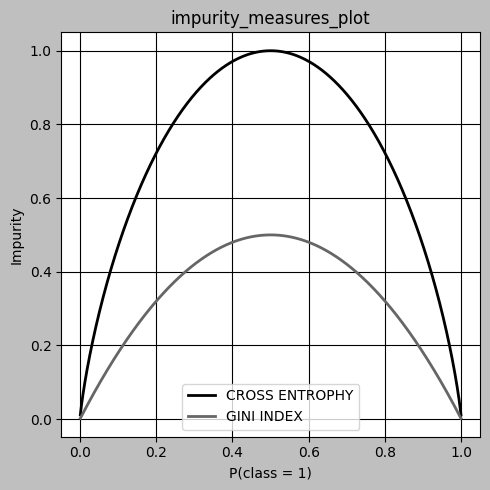

In [107]:
def impurity_measures_plot():

    '''
    Plots the cross entropy and gini index values with respect to the probability values of class 1.

    Args:

    Returns:

    Notes:
        1. Please do not change the provided code
        2. Both cross entropy and gini index should be on the same scatter plot
    '''

    prob_class1_arr = np.arange(1, 1000)/1000
    ce_arr = np.array([cross_entropy(p) for p in prob_class1_arr])
    gi_arr = np.array([gini_index(p) for p in prob_class1_arr])

    # TODO START: Complete the function
    plt.figure(figsize=(5, 5))
    plt.plot(prob_class1_arr, ce_arr, label="CROSS ENTROPHY", linewidth=2)
    plt.plot(prob_class1_arr, gi_arr, label="GINI INDEX",   linewidth=2)
    plt.title("impurity_measures_plot")
    plt.xlabel("P(class = 1)")
    plt.ylabel("Impurity")
    plt.legend()
    plt.style.use("grayscale")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    # TODO END

impurity_measures_plot()

## **5.2. Reduction in Impurity [6 pts]**

Recall that we also discussed information gain which is the change in entropy from the parent node to the children nodes. Gini reduction is similar to information gain except you replace entropy values with gini index.

### **5.2.1. Information Gain [3 pts]**

In [108]:
def information_gain(num_samples_parent, num_class1_parent, num_samples_child1, num_class1_child1):

    """

    Args:
        num_samples_parent: Number of samples in the parent node
        num_class1_parent: Number of samples of class 1 in parent node
        num_samples_child1: Number of samples in the first child node
        num_class1_child1: Number of samples of class 1 in the first child node

    Returns:
        ig: Information Gain
    """

    # TODO START: Complete the function
    # 1. You will need to calculate cross-entropy for the parent and child nodes
    # 2. Use the above entropies to finally calculate information gain

    # H(Y)
    p_parent = num_class1_parent / num_samples_parent
    H_parent = cross_entropy(p_parent)

    # H(Y = 1|X)
    n1 = num_samples_child1
    p1 = num_class1_child1 / n1
    H1 = cross_entropy(p1)

    # H(Y = 0|X)
    n2 = num_samples_parent - n1
    num_class1_child2 = num_class1_parent - num_class1_child1
    p2 = num_class1_child2 / n2
    H2 = cross_entropy(p2)

    # 4) 정보 이득 = H(Y) - H(Y|X) = H(Y) - (P(Y=1)H(Y=1|X) + P(Y=0)H(Y=0|X))
    ig = H_parent - ((n1 / num_samples_parent) * H1 + (n2 / num_samples_parent) * H2)
    return ig

    # TODO END


assert np.abs(information_gain(100, 60, 30, 5) - 0.251) < 0.01

### **5.2.2. Gini Reduction [3 pts]**

In [109]:
def gini_reduction(num_samples_parent, num_class1_parent, num_samples_child1, num_class1_child1):

    """

    Args:
        num_samples_parent: Number of samples in the parent node
        num_class1_parent: Number of samples of class 1 in parent node
        num_samples_child1: Number of samples in the first child node
        num_class1_child1: Number of samples of class 1 in the first child node

    Returns:
        gr: Gini Reduction
    """

    # TODO START: Complete the function

    # H(Y)
    p_parent  = num_class1_parent / num_samples_parent
    H_parent  = gini_index(p_parent)

    # H(Y = 1|X)
    p_child1 = num_class1_child1 / num_samples_child1
    H1 = gini_index(p_child1)

    # H(Y = 0|X)
    num2  = num_samples_parent - num_samples_child1
    num_class1_child2 = num_class1_parent - num_class1_child1
    p_child2 = num_class1_child2 / num2
    H2 = gini_index(p_child2)

    # 지니 감소?
    gr = H_parent - ((num_samples_child1 / num_samples_parent) * H1 + (num2 / num_samples_parent) * H2)
    return gr

    # TODO END

assert np.abs(gini_reduction(100, 60, 30, 5) - 0.161) < 0.01

# **6. Decision Tree [35 pts]**

In this section you will be training a decision tree classifier to predict the presence of diabetes in a person given various input features. The diabetes dataset that we are using is from the [2013-2014  National Health and Nutrition Examination Survey (NHANES)](https://wwwn.cdc.gov/nchs/nhanes/Default.aspx). We have reduced the dataset to only 20 features but the original dataset had over 1,800 features. `CSE-SSU_hw1_diabetes_train.csv` and `CSE-SSU_hw1_diabetes_X_test.csv` are the datasets that you would be using for training and testing respectively.

## **6.1. Load Datasets**

Read the files `CSE-SSU_hw1_diabetes_train.csv` and `CSE-SSU_hw1_diabetes_X_test.csv` into train_df and test_df respectively in the `load_diabetes_datasets` function.

In [239]:
import pandas as pd

def load_diabetes_datasets():
    '''
    Args:
        None
    Returns:
        train_df, test_df
    '''

    # TODO START: Complete the function

    train_df = pd.read_csv('CSE-SSU_hw1_diabetes_train.csv')
    test_df = pd.read_csv('CSE-SSU_hw1_diabetes_X_test.csv')

    return train_df, test_df

    # TODO END

## **6.2. Preprocess Datasets [10 pts]**

The datasets we have provided are not ready-to-use for machine learning and requires preprocessing. We want you to perform feature selection and handle missing values in both the training and test datasets.

### **6.2.1. Feature Selection**

For feature selection, you should retain the following features at least and experiment including/excluding the remaining features.

- 'RIDAGEYR'
- 'BMXWAIST'
- 'BMXHT'
- 'LBXTC'
- 'BMXLEG'
- 'BMXWT'
- 'BMXBMI'
- 'RIDRETH1'
- 'BPQ020'
- 'ALQ120Q'
- 'DMDEDUC2'
- 'RIAGENDR'
- 'INDFMPIR'

The column `DIABETIC` in the training dataset is the target variable.

### **6.2.2. Handling Missing Values**

We recommend you to drop rows with missing values in the training set. However, you should not drop rows with missing values in the test set. Instead, you should impute missing values in the test set with the mean of the corresponding columns in the training set.

In [243]:
train_df, test_df = load_diabetes_datasets()
from sklearn.impute import SimpleImputer

# Preprocessing
def preprocess_datasets(train_df, test_df, class_selection: int = None) -> tuple:
    '''
    Args:
        train_df
        test_df
        class_selection : test class selection
    Returns:
        train_df (preprocessed)
        test_df (preprocessed)
    Note:
        1. At least the following columns should be present in the final train_df:
            - 'RIDAGEYR'
            - 'BMXWAIST'
            - 'BMXHT'
            - 'LBXTC'
            - 'BMXLEG'
            - 'BMXWT'
            - 'BMXBMI'
            - 'RIDRETH1'
            - 'BPQ020'
            - 'ALQ120Q'
            - 'DMDEDUC2'
            - 'RIAGENDR'
            - 'INDFMPIR'
            - 'DIABETIC'
        2. test_df will have all the columns in train_df except the 'DIABETIC' column
        3. Drop any rows in train_df that have missing values
        4. DO NOT drop rows with missing values test_df. Impute missing values in test_df with the means of the corresponding columns in train_df.
    '''

    # TODO START: Complete the function

    # 꼭 포함해야 하는 열
    # Case 1
    if class_selection == 1:
        columns = ['RIDAGEYR','BMXWAIST','BMXHT','LBXTC','BMXLEG','BMXWT','BMXBMI','RIDRETH1','BPQ020','ALQ120Q','DMDEDUC2','RIAGENDR','INDFMPIR','LBDSGBSI','DIABETIC']
    # Case 2
    elif class_selection == 2:
        columns = ['RIDAGEYR','BMXWAIST','BMXHT','LBXTC','BMXLEG','BMXWT','BMXBMI','RIDRETH1','BPQ020','ALQ120Q','DMDEDUC2','RIAGENDR','INDFMPIR','LBDSGBSI','BPAARM', 'DIABETIC']
    # Case 3
    elif class_selection == 3:
        columns = ['RIDAGEYR','BMXWAIST','BMXHT','LBXTC','BMXLEG','BMXWT','BMXBMI','RIDRETH1','BPQ020','ALQ120Q','DMDEDUC2','RIAGENDR','INDFMPIR','URDECPLC','BPAARM','DIABETIC']
    # Default Case
    else:
        columns = ['RIDAGEYR','BMXWAIST','BMXHT','LBXTC','BMXLEG','BMXWT','BMXBMI','RIDRETH1','BPQ020','ALQ120Q','DMDEDUC2','RIAGENDR','INDFMPIR','DIABETIC']

    essential = ['RIDAGEYR','BMXWAIST','BMXHT','LBXTC','BMXLEG','BMXWT','BMXBMI','RIDRETH1','BPQ020','ALQ120Q','DMDEDUC2','RIAGENDR','INDFMPIR','DIABETIC']

    # 1) 열 필터링 + 학습 데이터에서 결측치 행 제거
    train_df = train_df[columns].copy().dropna(subset=essential).reset_index(drop=True)

    # 2) 테스트 데이터 열 정리
    test_cols = [c for c in columns if c != 'DIABETIC']
    test_df  = test_df[test_cols].copy()

    # 3) 학습 데이터 평균으로 테스트 데이터 결측치 대체
    imputer = SimpleImputer(strategy='mean')
    imputer.fit(train_df.drop(columns=['DIABETIC']))
    test_imputed = imputer.transform(test_df)

    # 4) 넘파이→DataFrame으로 되돌리기(열 순서 유지)
    test_df = pd.DataFrame(test_imputed, columns=test_cols)

    return train_df, test_df

    # TODO END

train_df_processed, test_df_processed = preprocess_datasets(train_df, test_df)


## **6.3. Decision Tree Training with Pruning [14 pts]**

Next, we will be fitting a decision tree classifier and prune the tree appropriately. The `DecisionTreeClassifier` in scikit-learn uses a way of pruning called **Minimal Cost-Complexity Pruning**. We won't cover the specifics, but you can learn more from this [link](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning) if you wish. But, you don't need to learn the details in order to use it effectively. The amount of pruning is entirely dependent on the value of the `ccp_alpha` parameter. In order to tune the `ccp_alpha` parameter, you will use [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). The purpose of cross-validation is to estimate how well a model will generalize on unseen data.

Implement the function `best_ccp_alpha_f1` to do automatic tuning of the `ccp_alpha` parameter.  Your function should vary the value of the `ccp_alpha` parameter and return the value for `ccp_alpha` with the highest cross-validation F1 score over the given dataset `train_df`. The sklearn library has a [built-in function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.cost_complexity_pruning_path) to generate a list of effective ccp_alphas. Given the imbalanced nature of the dataset, most of the people in the data set are non-diabetic. You can get a model with very high test accuracy by always predicting no one is diabetic. To address this problem, more importance should be given to the [F1 score](https://en.wikipedia.org/wiki/F-score) of your model rather than the classification accuracy.

For this problem, you need to have at least 80% accuracy and a F1 score of 0.2 on the test dataset to get full points.

In [244]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

train_df, test_df = preprocess_datasets(train_df, test_df)

def best_ccp_alpha_f1(train_df):
    """
    Returns the pruning parameter (best_ccp_alpha) with the highest cross-validation F1 score along with the
    five cross-validation F1 scores corresponding (cv_f1_scores).

    Args:
        train_df

    Returns:
        best_ccp_alpha: the tuned best ccp alpha value
        cv_f1_scores: the five cross-validation F1 scores

    """

    # TODO START: Complete the function
    X = train_df.drop(columns=['DIABETIC'])
    y = train_df['DIABETIC']

    # 가능한 alpha 값 구하기
    path        = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X, y)
    ccp_alphas  = np.unique(path.ccp_alphas)      # 중복 제거

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    alpha_scores = {}
    for alpha in ccp_alphas:
        dt = DecisionTreeClassifier(random_state=0,
                                    ccp_alpha=alpha,
                                    class_weight='balanced')   # 클래스 불균형 보정
        f1 = cross_val_score(dt, X, y, cv=kfold, scoring='f1')
        alpha_scores[alpha] = f1

    # 평균 F1이 가장 높은 alpha 선택
    best_ccp_alpha = max(alpha_scores, key=lambda a: alpha_scores[a].mean())
    cv_f1_scores   = alpha_scores[best_ccp_alpha].tolist()

    return best_ccp_alpha, cv_f1_scores

    # TODO END

def refit_and_predict(train_df, test_df, best_ccp_alpha):
    """
    Fit a decision tree classifier on the training data using the best_ccp_alpha value and output the predictions on the
    test set.

    Args:
        train_df
        test_df
        best_ccp_alpha

    Returns:
        y_test_pred: The predicted values for the test set
    """

    # TODO START: Complete the function
    X_train = train_df.drop(columns=['DIABETIC'])
    y_train = train_df['DIABETIC']

    clf = DecisionTreeClassifier(random_state=0,
                                 ccp_alpha=best_ccp_alpha,
                                 class_weight='balanced')
    clf.fit(X_train, y_train)

    y_test_pred = clf.predict(test_df)
    return y_test_pred
    # TODO END

best_ccp_alpha, cv_f1_scores = best_ccp_alpha_f1(train_df)
y_test_pred_DT = refit_and_predict(train_df, test_df, best_ccp_alpha)
print(y_test_pred_DT)

[0 0 0 ... 1 0 0]


## **6.4. Computing Confidence Intervals [5 pts]**

Even though you may have computed the average F1 score across the held-out folds during cross validation, how confident can you be that the number you computed is the true F1 score for that set of features? If you try rerunning your code with a different random seed, you may actually get a different F1 score. But which one is right?

In order to answer this question, we will compute a confidence interval based on the Student's t-distribution, which will tell us with 99\% confidence that the true mean is within a lower and upper bound. To compute the confidence interval, we need to compute the sample mean, $\bar{x}$, sample standard deviation, $S$, and the number of observations for each classifier, $n$. ***In our specific case, the number of observations should be 5 because we have 5 reported F1 scores from cross-validation.***

Then, the confidence interval is computed by
    
$$\bar{x} \pm t \cdot \frac{S}{\sqrt{n}}$$

Here, $t$ is the critical value, which we can look up using the provided t-table (https://www.stat.colostate.edu/inmem/gumina/st201/pdf/Utts-Heckard_t-Table.pdf). (Round up the critical value to the second digit below the decimal point) For example, when $n=10$, if we are looking for a 99\% confidence interval, then the number in the 99\% confidence column with degrees of freedom of $n-1=9$ would be $t=3.25$. Then, we can plug in all of the statistics into the confidence interval formula and get a range of values for which we are 99\% confident that the true F1 score of the classifier falls between.

For this computation, we should use the unbiased estimator of the variance, which means that the degrees of freedom on the standard deviation calculation must be set. Look in the optional arguments of np.std to learn more.

In [245]:
from math import sqrt
# 사전 방식(t‑table 일부; 두 번째 소수점 자리 올림 값)
_t_lookup = {
    # df : (t_(0.80/2), t_(0.99/2))   0.80 → α=0.20, 0.99 → α=0.01
    4:  (1.53, 4.60),
    5:  (1.48, 4.03),
    6:  (1.44, 3.71),
    7:  (1.42, 3.50),
    8:  (1.40, 3.36),
    9:  (1.38, 3.25),
    10: (1.37, 3.17),
    20: (1.33, 2.85),
    30: (1.31, 2.75),
}

def _t_critical(df, confidence):
    """
    df : 자유도, confidence : 0.99 또는 0.80
    SciPy 가 있으면 정확히, 없으면 lookup 사용
    """
    lookup = {
        (4, 0.99): 4.60,
        (4, 0.80): 1.53,
        # 필요한 경우 df 키를 추가
    }
    if (df, confidence) in lookup:
        return lookup[(df, confidence)]
    raise ValueError("t‑값 테이블에 없는 자유도 / 신뢰수준입니다.")

def calculate_confidence_interval(cv_f1_scores):
    '''
    Args:
        cv_f1_scores      :   np.array, reported cross-validation F1 scores
    Returns:
        interval    :   np.array, lower bound and upper bound of the 99% confidence interval
    '''

    # TODO START: Complete the function
    # This function should be able to handle two confidence levels of 99% and 80%

    scores = np.asarray(cv_f1_scores, dtype=float)
    n      = scores.size
    if n < 2:
        raise ValueError("At least two observations are required")

    # 1. 통계량 계산
    x_bar = scores.mean()          # 표본 평균
    S     = scores.std(ddof=1)     # 불편표준편차 (n-1 로 나눔)
    se    = S / sqrt(n)            # 표준오차
    df    = n - 1                  # 자유도

    # 2. t-critical(99 %) – t-table 값(두 번째 소수점까지) 사용
    if df in _t_lookup:                    # 사전에서 정확히 찾기
        t_crit = _t_lookup[df][1]          # index 1 → 99 % 열
    else:                                  # 없으면 가장 가까운 df 사용
        closest_df = min(_t_lookup, key=lambda k: abs(k - df))
        t_crit     = _t_lookup[closest_df][1]

    # 3. 신뢰구간 계산
    margin   = t_crit * se
    interval = np.array([x_bar - margin, x_bar + margin])

    return interval

    # TODO END

In [246]:
def test_confidence_intervals():
    data = np.array([15.6, 16.2, 22.5, 20.5, 16.4])
    result = np.round(calculate_confidence_interval(data), 3)
    interval = np.array([11.918, 24.562])
    assert (np.array_equal(interval, result))

test_confidence_intervals()

In [256]:
import json
raw_train_df, raw_test_df = load_diabetes_datasets()
results = []
for i in range(1, 4):
    train_df, test_df = preprocess_datasets(raw_train_df, raw_test_df, i)
    best_ccp_alpha, cv_f1_scores = best_ccp_alpha_f1(train_df)
    interval = calculate_confidence_interval(cv_f1_scores)
    results.append(
        {
            "Feature Set": i,
            "Best CCP Alpha": float(best_ccp_alpha),
            "Mean Cross-validation F1 Score": float(np.mean(cv_f1_scores)),
            "Confidence Interval": interval.tolist(),
        }
    )

results = pd.DataFrame(results)
results

,Feature Set,Best CCP Alpha,Mean Cross-validation F1 Score,Confidence Interval
0,1,0.003928,0.416225,"[0.35381327514763267, 0.47863628874726455]"
1,2,0.003928,0.416225,"[0.35381327514763267, 0.47863628874726455]"
2,3,0.002084,0.402124,"[0.33618422846890467, 0.4680628895986823]"


## **6.5. Performance Table [6 pts, manually graded]**

Repeat the process for two other sets of features and present a performance table (like the one shown below) that compares the F1 scores and confidence intervals of the three sets of features, indicating which one is your chosen best set. Remember that each set should include the 13 features mentioned earlier. As mentioned earlier, submit this table along with the written homework solutions as this is manually graded.

---

S.No. | Features                              | Best CCP Alpha (트리 복잡도 조절 최적 알파값) | Mean Cross-validation F1 Score (교차 검증으로 얻은 5개의 F1점수 평균) | Cross-validation F1 Score Confidence Interval (이건뭐지)
--- |---------------------------------------|-----------------------------------|---------------------------------------------------------|------------------------------------------------------
1 | 기본13개 열 + OHQ565, OHX28CSC            | 0.003927507624716095              | 0.4162247819474486                                      | 0.35381327514763267 ~ 0.47863628874726455            |
2 | 기본13개 열 + OHX19SE, URDECPLC, LBDSGBSI | 0.003927507624716123              | 0.4162247819474486                                      | 0.35381327514763267 ~ 0.47863628874726455            |
3 | 기본13개 열 + URDECPLC, OHQ565            | 0.002083997873471556              | 0.4021235590337935                                      | 0.33618422846890467 ~ 0.4680628895986823             |


# **7 Fit the Logistic Regression on Diabetes dataset (With only the required features in 6.2) [14 pts]**

Fit a simple logistic regression on the training data using l2 penalty, $\alpha$ = 0.01, maximum of iterations = 1000, and weight for the regularization consant for the l2 penalty  term is 0.001.
You should be rescaling features using MinMaxScaler from sklearn.preprocessing to make sure that the features are properly scaled for learning.

In [253]:
train_df, test_df = load_diabetes_datasets()
train_df, test_df = preprocess_datasets(train_df, test_df)

In [254]:
from sklearn.preprocessing import MinMaxScaler

def fit_and_predict_logistic(train_df, test_df):
    """
    Fit a logistic regression classifier on the training data and output the predictions on the
    test set.

    Args:
        train_df
        test_df

    Returns:
        y_test_pred: The predicted values for the test set
    """

    # TODO START: Complete the function
    # 데이터 세팅
    x_train = train_df.drop(columns=['DIABETIC']).copy() # train_df에서 y 라벨 제거
    y_label = train_df['DIABETIC'].values # train_df에서 y 라벨만 가져오기

    # MinMaxScaler : train_df의 모든 feature를 0~1로 정규화해주는 객체
    scaler = MinMaxScaler()
    scaler.fit(x_train) # train_df의 feature에 맞춰서 scaler 객체 학습
    scaled_x_train = scaler.transform(x_train) # train_df의 feature 정규화
    scaled_x_test = scaler.transform(test_df) # test_df의 feature 정규화

    # Logistic Regression
    logistic_regressor = LogisticRegression(penalty='l2', alpha=0.01, max_iter=1000, lambd=0.001)
    logistic_regressor.fit(scaled_x_train, y_label)

    # Test
    y_test_predicated = logistic_regressor.predict(scaled_x_test).astype(int)
    return y_test_predicated

    # TODO END

y_test_pred_logistic = fit_and_predict_logistic(train_df, test_df)

print(y_test_pred_logistic)
np.unique(y_test_pred_logistic, return_counts=True)

[0 0 0 ... 0 0 0]


(array([0]), array([2035]))

## **8. Best Model on Diabetes Dataset, and Why. [6pts, manually graded]**

Which one of Logistic Regression, and Decision Tree will provide the best performance on this dataset. Give reasons for your answer.

## Submit to LMS
Congratulation on completing HW1 coding assignment! The last step you need to do is to save this iPython notebook, rename it as **hw1-{yourstudentID}.ipynb** and submit it to LMS.

*If using Google Colab, in order to download the notebook from Google Colab, click File->Download->Download .ipynb*
